This dataset was taken from Aryabhatta Research Institute of Observational Sciences (ARIES), Nainital, India. The images were captured by the in-house 1.3m telescope of the observatory situated in Devasthal, Nainital, India. The original images captured were 2kx2k in size which was reduced to 64x64 cutouts from the images to isolate the sources in a single image.

For labelling the images, image segmentation was used to identify the sources in the image, and finally the center coordinates of the found sources were queried with the SDSS database to give a label corresponding to each 64x64 cutout.

This data is generated from scratch using the real-world data. Use this dataset to train computer vision models to classify stellar sources like stars and galaxies in the telescope images.

In [19]:
# Importing the libraries used in this notebook
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# Loading Dataset

In [2]:
def load_dataset(dataset_pth):

    '''
    parameters
    dataset_pth => The path of the dataset directory

    returns 
    img_pths => Array containing the path to the dataset images
    img_labels => Array containing the labels to the corresponding dataset images
    class_list => List of classes which are enumerated in the img_labels array
    '''

    img_pths = []
    img_labels = []
    class_list = []
    
    classes = os.listdir(dataset_pth)
    for index, class_name in enumerate(classes):
        class_pth = os.path.join(dataset_pth, class_name)
        img_names = os.listdir(class_pth)
        class_list.append(class_name)
        for img in img_names:
            img_pth = os.path.join(class_pth, img)
            img_pths.append(img_pth)
            img_labels.append(index)

    return img_pths, img_labels, class_list

In [3]:
img_pths, img_labels, class_list = load_dataset("./dataset")

In [4]:
print(len(img_pths), len(img_labels), len(class_list))

3986 3986 2


# Data Preprocessing

In [17]:
image = cv2.imread("./dataset\galaxy\grb0422a_01_1013_1727_3.jpg", cv2.IMREAD_GRAYSCALE)
image.shape

(64, 64)

In [20]:
image = np.array(image)

In [21]:
image

array([[ 66, 105, 128, ...,  96,  67,  92],
       [ 53,  33,  80, ...,  78,  49, 118],
       [ 72,  63,  95, ...,  82, 131,  73],
       ...,
       [ 77,  53,  90, ...,  99,   8, 101],
       [112,  72,  31, ...,  95, 106,  64],
       [ 61,  99, 121, ...,  97,  82,  58]], dtype=uint8)

In [24]:
np.sum(image, axis=0)

array([4954, 4843, 5371, 4998, 5516, 5020, 4964, 4913, 5186, 4648, 4760,
       4896, 4975, 4916, 4740, 5174, 5193, 5271, 5315, 5131, 4965, 5131,
       4987, 5223, 5348, 5839, 5352, 5376, 5822, 5674, 6248, 6473, 6769,
       6647, 6239, 6183, 5692, 5267, 5491, 5132, 5335, 5087, 5362, 5238,
       4914, 5118, 4919, 5188, 5063, 4609, 5385, 5049, 5200, 5203, 5121,
       5396, 5323, 5360, 5171, 5562, 5250, 4759, 4840, 5031], dtype=uint32)

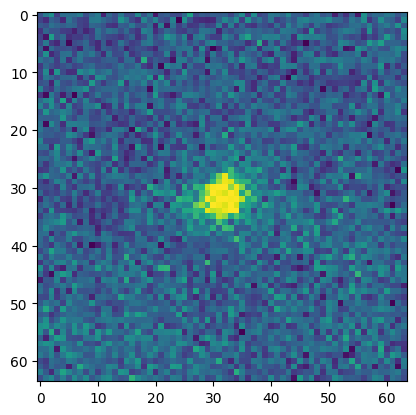

In [16]:
plt.imshow(image)

In [29]:
def project_dataset(img_pths):

    '''
    parameters
    img_pths => Array containing the paths to the dataset images

    returns
    img_data => The projected data of the image dataset along axis 0 and axis 1 combined
    '''

    img_data = []
    for img_pth in img_pths:
        projected_values = []
        image = cv2.imread(img_pth, cv2.IMREAD_GRAYSCALE)
        image = np.array(image)/256
        projected_values.extend(np.sum(image, axis=0))
        projected_values.extend(np.sum(image, axis=1))
        img_data.append(projected_values)

    return img_data

In [37]:
X_data = project_dataset(img_pths)

In [41]:
X_data

[[19.3515625,
  18.91796875,
  20.98046875,
  19.5234375,
  21.546875,
  19.609375,
  19.390625,
  19.19140625,
  20.2578125,
  18.15625,
  18.59375,
  19.125,
  19.43359375,
  19.203125,
  18.515625,
  20.2109375,
  20.28515625,
  20.58984375,
  20.76171875,
  20.04296875,
  19.39453125,
  20.04296875,
  19.48046875,
  20.40234375,
  20.890625,
  22.80859375,
  20.90625,
  21.0,
  22.7421875,
  22.1640625,
  24.40625,
  25.28515625,
  26.44140625,
  25.96484375,
  24.37109375,
  24.15234375,
  22.234375,
  20.57421875,
  21.44921875,
  20.046875,
  20.83984375,
  19.87109375,
  20.9453125,
  20.4609375,
  19.1953125,
  19.9921875,
  19.21484375,
  20.265625,
  19.77734375,
  18.00390625,
  21.03515625,
  19.72265625,
  20.3125,
  20.32421875,
  20.00390625,
  21.078125,
  20.79296875,
  20.9375,
  20.19921875,
  21.7265625,
  20.5078125,
  18.58984375,
  18.90625,
  19.65234375,
  19.69140625,
  19.78515625,
  17.9609375,
  18.22265625,
  19.6796875,
  18.18359375,
  17.125,
  18.4375

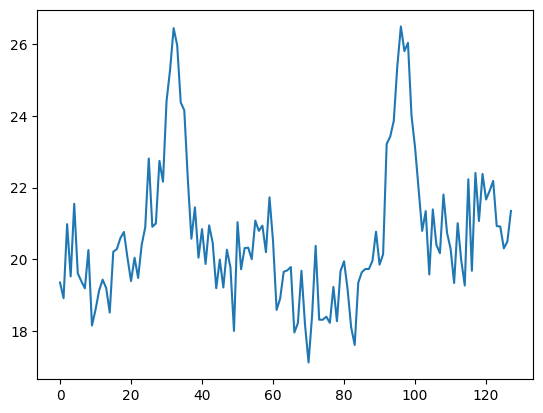

In [38]:
plt.plot(X_data[0])

In [42]:
def shuffle_dataset(data, labels):

    '''
    parameters
    data => The dataset containing the projected images
    labels => The labels of the data

    returns 
    X => shuffled dataset of data
    y => shuffled labels but preserving the mapping between data and labels
    '''

    temp = list(zip(data, labels))
    np.random.shuffle(temp)
    X, y = zip(*temp)

    return X, y

In [43]:
X, y = shuffle_dataset(X_data, img_labels)

In [46]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)